# Data Cleaning
#Ignore Missing Values Row / Delete Row & Columns


In [219]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df=pd.read_csv(r'Bengaluru_House_Data.csv')


In [191]:
df.shape

(13320, 9)

In [192]:
df.head(6)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00


In [193]:
pd.set_option('display.max_columns',None)

In [194]:
pd.set_option('display.max_rows',None)

In [195]:
df.head(6)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [197]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [198]:
plt.figure(figsize=[25,25])

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

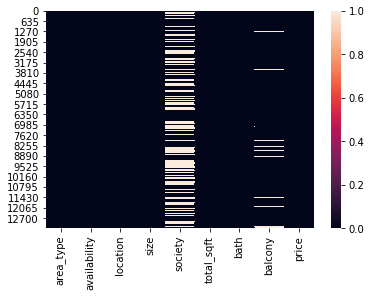

In [199]:
sns.heatmap(df.isnull())

In [200]:
null_var=df.isnull().sum()/df.shape[0]*100
null_var

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [201]:
drop_column=null_var[null_var>4].keys()

In [202]:
drop_column

Index(['society', 'balcony'], dtype='object')

In [203]:
df2_drop_cln=df.drop(columns=drop_column)

In [204]:
df2_drop_cln.shape

(13320, 7)

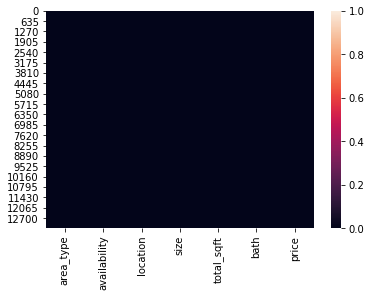

In [205]:
sns.heatmap(df2_drop_cln.isnull())

In [206]:
df3_drop_rows=df2_drop_cln.dropna() #Default row (delete)

In [207]:
df3_drop_rows.shape

(13246, 7)

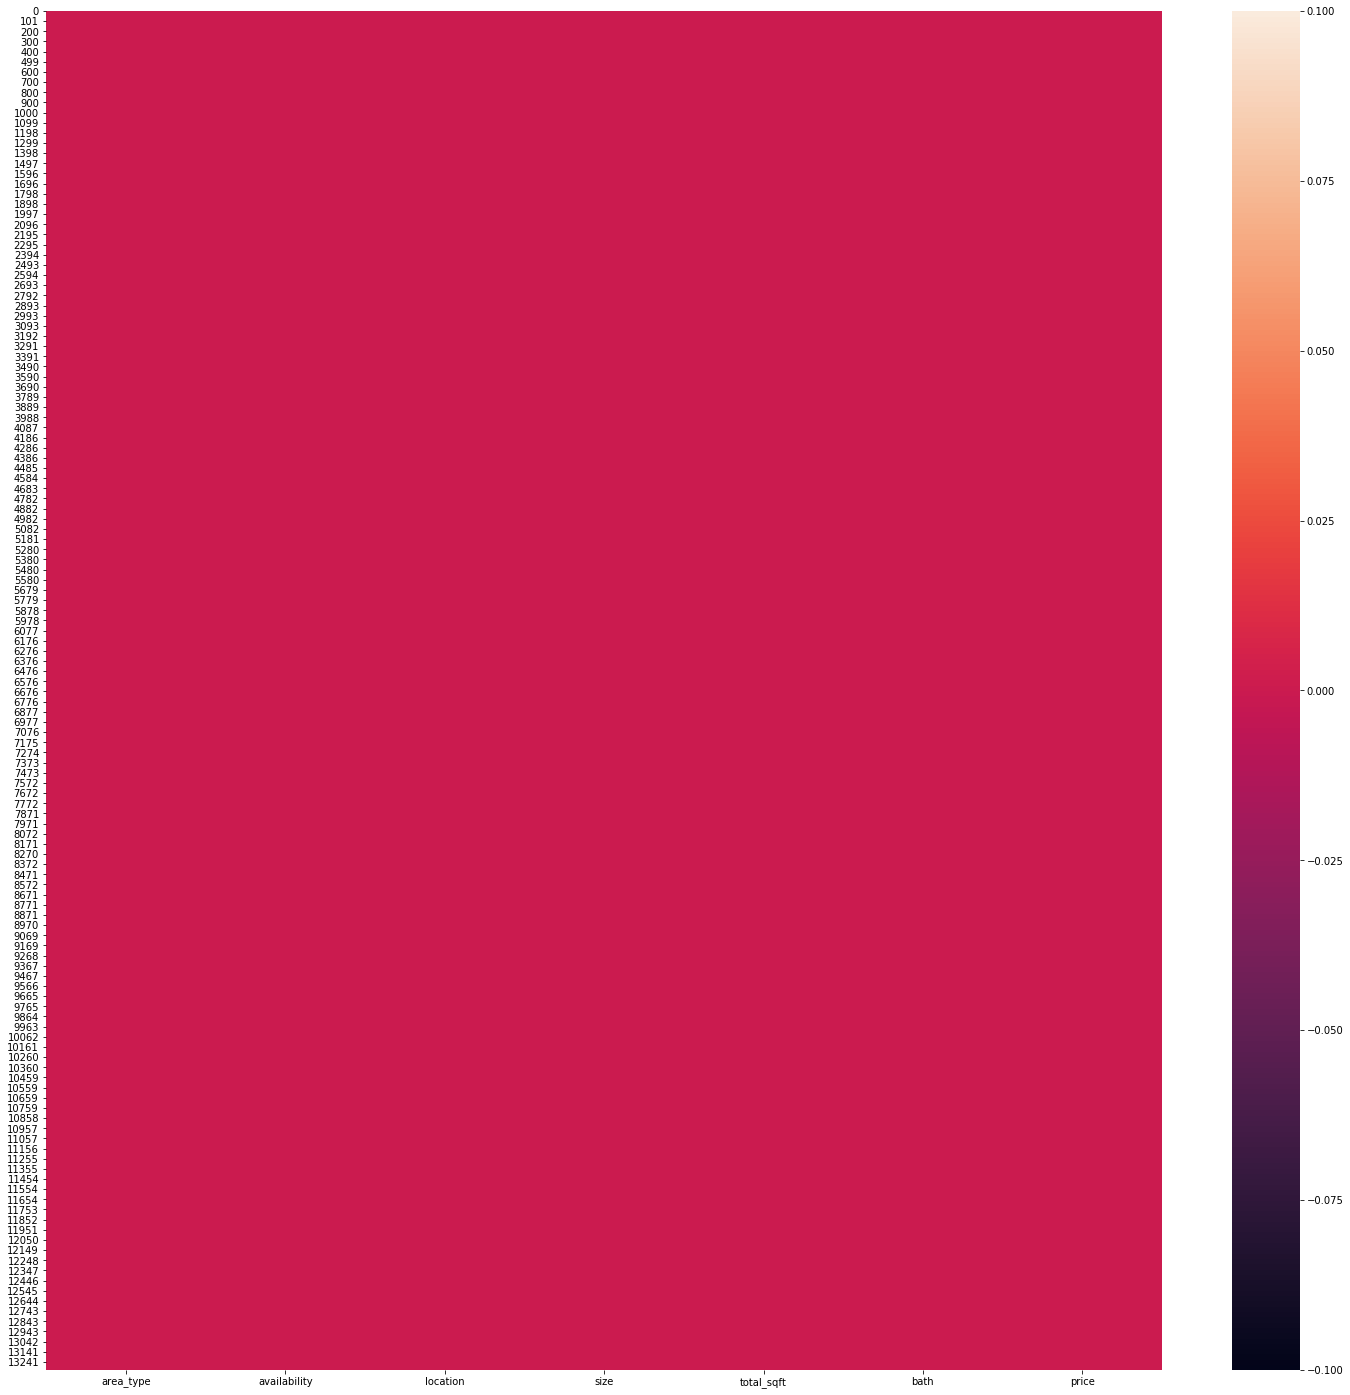

In [208]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [209]:
df3_drop_rows.isnull().sum().sum() #zero null value in dataset

0

In [210]:
df3_drop_rows.select_dtypes(include=["int64","float64"]).columns


Index(['bath', 'price'], dtype='object')

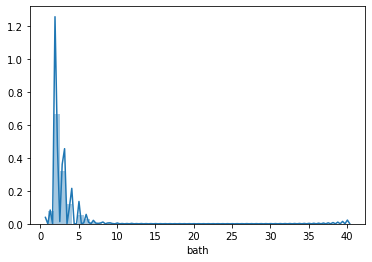

In [211]:
sns.distplot(df['bath']) #original

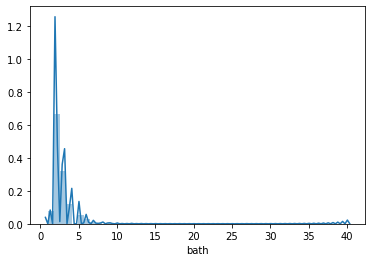

In [212]:
sns.distplot(df3_drop_rows['bath'])

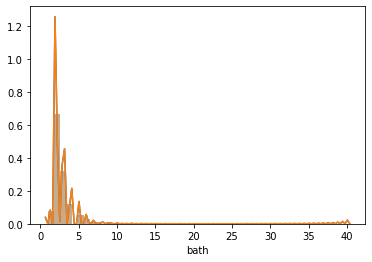

In [213]:
sns.distplot(df['bath'])
sns.distplot(df3_drop_rows['bath'])

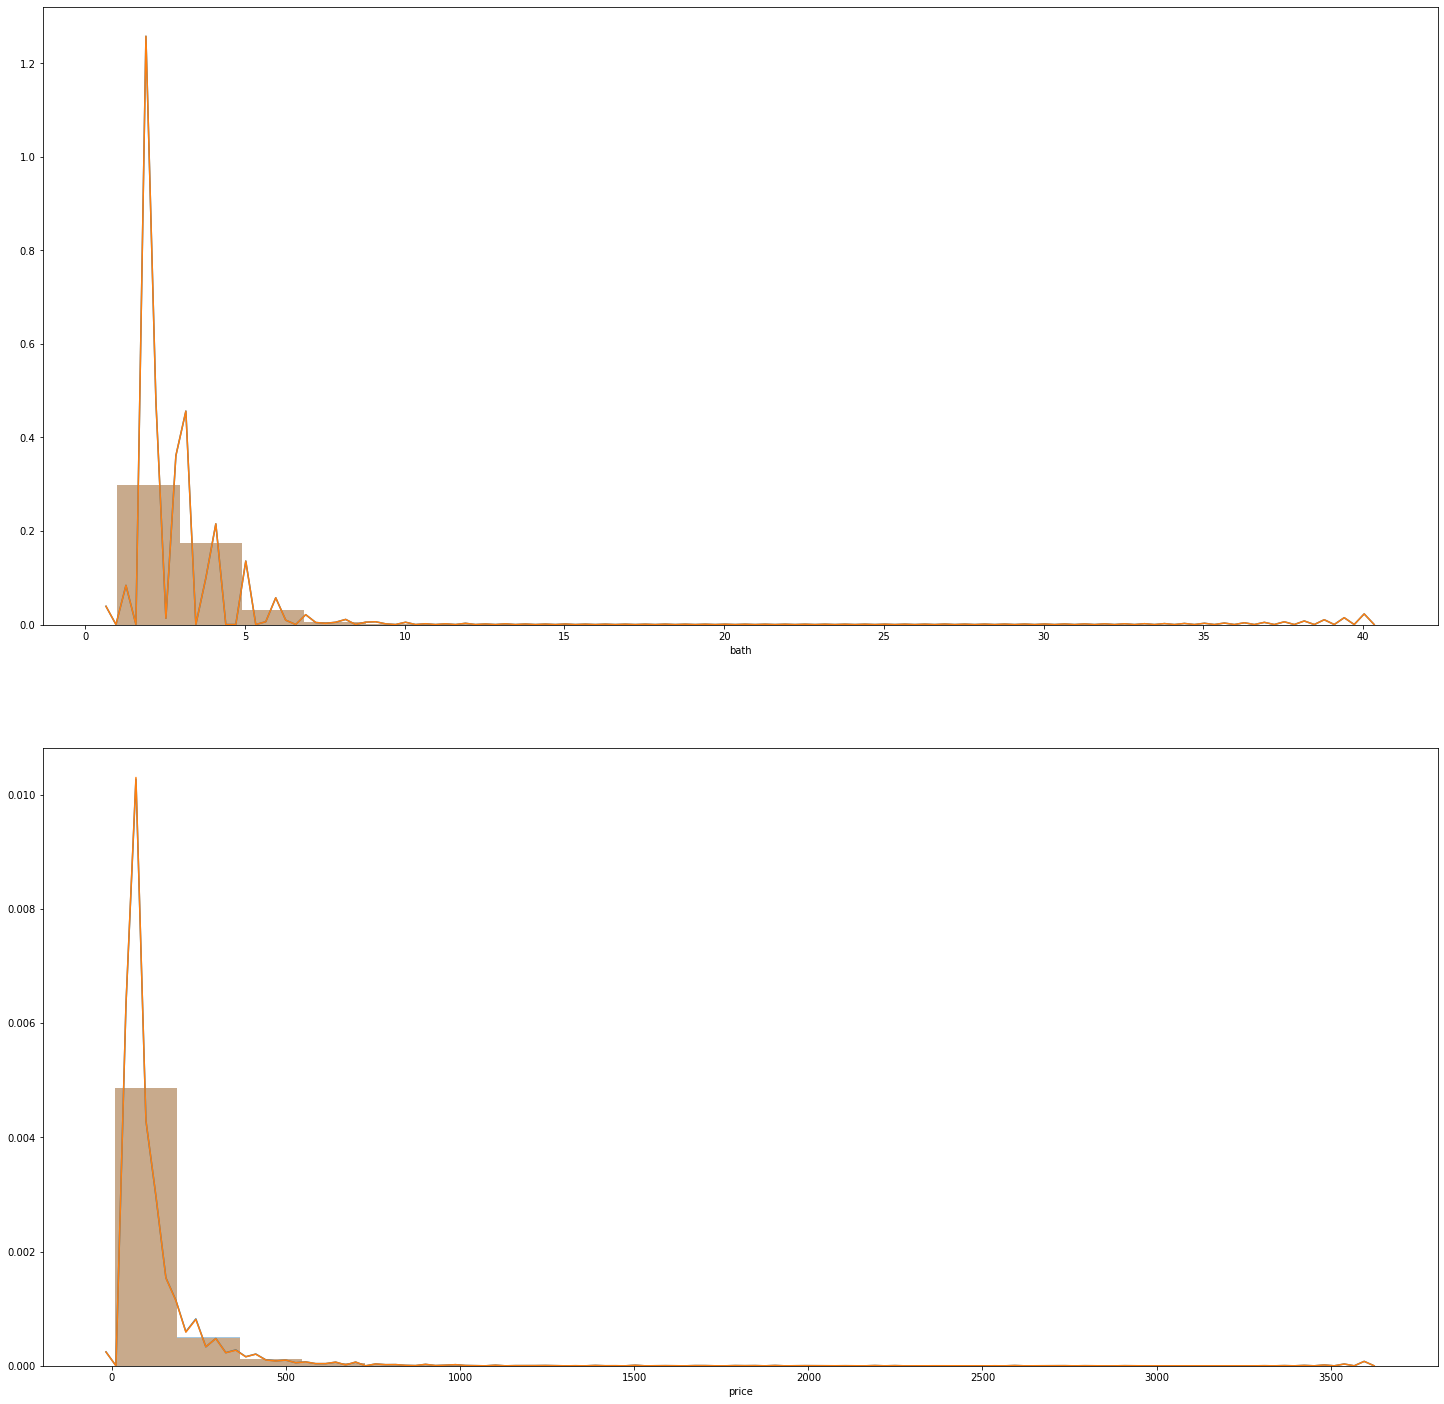

In [214]:
num_var=['bath', 'price']
plt.figure(figsize=(25,25))
for i, var in enumerate(num_var):
    plt.subplot(2,1,i+1)
    sns.distplot(df[var],bins=20)
    sns.distplot(df3_drop_rows[var],bins=20)

In [215]:
df3_drop_rows.select_dtypes(include=["object"]).columns
#categorial variables

Index(['area_type', 'availability', 'location', 'size', 'total_sqft'], dtype='object')

In [216]:
pd.concat([df["area_type"].value_counts()/df.shape[0]*100,
           df3_drop_rows["area_type"].value_counts()/df.shape[0]*100],axis=1,
           keys=["area_type_org","area_type_clean"])

,area_type_org,area_type_clean
Super built-up Area,65.990991,65.615616
Built-up Area,18.153153,18.093093
Plot Area,15.202703,15.082583
Carpet Area,0.653153,0.653153


In [217]:
def cat_vat_dist(var):
    return pd.concat([df["area_type"].value_counts()/df.shape[0]*100,
           df3_drop_rows["area_type"].value_counts()/df.shape[0]*100],axis=1,
           keys=[var+"_org",var+"_clean"])
    
    

In [218]:
cat_vat_dist("location")

,location_org,location_clean
Super built-up Area,65.990991,65.615616
Built-up Area,18.153153,18.093093
Plot Area,15.202703,15.082583
Carpet Area,0.653153,0.653153
